In [61]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import fpgrowth
from xgboost.sklearn import XGBClassifier
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
import shap
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix, ConfusionMatrixDisplay

In [62]:
df = pd.read_csv("./data/datasetFpmIcuStayDetail.csv")
df

,icustay_id,age,pulmonary,pao2fio2,mingcs,heartrate_mean,wbc_min,wbc_max,sysbp_mean,urineoutput,...,hospstay_seq,first_hosp_stay,intime,outtime,los_icu,icustay_seq,first_icu_stay,elixhauser_vanwalraven,elixhauser_sid29,elixhauser_sid30
0,205907,50.645076,3,NaN,15.0,114.774194,32.1,36.1,138.966667,5.0,...,1,t,2161-07-31 17:00:41,2161-08-12 16:50:22,11.9928,1,t,12.0,18.0,20.0
1,216788,60.761024,0,NaN,15.0,92.071429,7.4,7.4,100.489362,1500.0,...,1,t,2177-01-01 11:28:00,2177-01-05 11:34:00,4.0042,1,t,0.0,-1.0,6.0
2,211038,64.889926,0,NaN,15.0,89.371429,10.0,10.0,103.228571,1766.0,...,1,t,2147-11-10 12:38:00,2147-11-12 17:44:00,2.2125,1,t,0.0,-2.0,-2.0
3,200728,56.996581,0,NaN,14.0,88.189189,9.5,18.8,154.365854,2135.0,...,1,t,2151-01-04 13:05:15,2151-01-06 14:59:35,2.0794,1,t,7.0,8.0,17.0
4,202996,64.887600,3,128.571429,15.0,89.310345,7.3,13.3,143.606061,2700.0,...,1,t,2139-10-05 16:14:41,2139-10-27 15:36:18,21.9733,1,t,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108382,284002,72.789531,1,165.000000,15.0,90.866667,27.0,41.8,109.366667,2500.0,...,1,t,2104-10-17 19:03:11,2104-10-25 02:36:12,7.3146,1,t,8.0,12.0,22.0
108383,299350,61.902972,1,404.000000,11.0,89.724138,7.7,7.8,150.066667,1665.0,...,1,t,2101-10-21 13:33:59,2101-10-23 18:48:58,2.2187,1,t,19.0,15.0,19.0
108384,295083,66.789575,0,NaN,15.0,91.562500,22.5,22.5,105.675676,1064.0,...,1,t,2189-12-07 08:35:34,2189-12-11 10:55:24,4.0971,1,t,0.0,0.0,8.0
108385,247984,85.078020,1,NaN,15.0,92.227273,17.6,17.6,124.818182,786.0,...,1,t,2186-11-06 01:35:30,2186-11-14 19:18:05,8.7379,1,t,12.0,13.0,17.0


In [63]:
df = df.drop_duplicates(subset="icustay_id")
df

,icustay_id,age,pulmonary,pao2fio2,mingcs,heartrate_mean,wbc_min,wbc_max,sysbp_mean,urineoutput,...,hospstay_seq,first_hosp_stay,intime,outtime,los_icu,icustay_seq,first_icu_stay,elixhauser_vanwalraven,elixhauser_sid29,elixhauser_sid30
0,205907,50.645076,3,NaN,15.0,114.774194,32.1,36.1,138.966667,5.0,...,1,t,2161-07-31 17:00:41,2161-08-12 16:50:22,11.9928,1,t,12.0,18.0,20.0
1,216788,60.761024,0,NaN,15.0,92.071429,7.4,7.4,100.489362,1500.0,...,1,t,2177-01-01 11:28:00,2177-01-05 11:34:00,4.0042,1,t,0.0,-1.0,6.0
2,211038,64.889926,0,NaN,15.0,89.371429,10.0,10.0,103.228571,1766.0,...,1,t,2147-11-10 12:38:00,2147-11-12 17:44:00,2.2125,1,t,0.0,-2.0,-2.0
3,200728,56.996581,0,NaN,14.0,88.189189,9.5,18.8,154.365854,2135.0,...,1,t,2151-01-04 13:05:15,2151-01-06 14:59:35,2.0794,1,t,7.0,8.0,17.0
4,202996,64.887600,3,128.571429,15.0,89.310345,7.3,13.3,143.606061,2700.0,...,1,t,2139-10-05 16:14:41,2139-10-27 15:36:18,21.9733,1,t,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108271,282141,52.750732,0,NaN,14.0,84.269231,3.7,8.0,117.166667,4225.0,...,1,t,2121-01-28 18:47:24,2121-01-30 21:01:09,2.0929,1,t,3.0,6.0,6.0
108305,269434,64.819398,0,NaN,8.0,107.321429,15.0,18.0,159.321429,2740.0,...,1,t,2135-03-26 18:24:01,2135-03-28 20:32:04,2.0889,1,t,2.0,3.0,6.0
108316,271929,71.148891,0,NaN,13.0,108.500000,18.1,18.1,106.318182,2380.0,...,2,f,2128-06-16 13:31:08,2128-06-22 21:47:12,6.3445,1,t,11.0,3.0,7.0
108337,273416,71.486196,0,NaN,14.0,79.826087,15.3,19.4,144.904762,2550.0,...,1,t,2121-08-20 18:16:12,2121-08-22 18:22:00,2.0040,1,t,4.0,5.0,4.0


In [64]:
df = df[(df['age'] > 18) & (df['age'] < 89)]

In [65]:
df2 = df[[column for column in df if df[column].count() / len(df) >= 0.5]]
print("List of dropped columns:", end=" ")
for c in df.columns:
    if c not in df2.columns:
        print(c, end=", ")
print('\n')
df = df2

List of dropped columns: dod, 



In [66]:
df.pop("hospital_expire_flag")
df.pop("icustay_id")
df.pop("subject_id")
df.pop("hadm_id")
df.pop("hospstay_seq")
df.pop("icustay_seq")
df.pop("admittime")
df.pop("dischtime")
df.pop("ethnicity")
df.pop("admission_type")
df.pop("first_hosp_stay")
df.pop("intime")
df.pop("outtime")

0         2161-08-12 16:50:22
1         2177-01-05 11:34:00
2         2147-11-12 17:44:00
3         2151-01-06 14:59:35
4         2139-10-27 15:36:18
                 ...         
108271    2121-01-30 21:01:09
108305    2135-03-28 20:32:04
108316    2128-06-22 21:47:12
108337    2121-08-22 18:22:00
108361    2188-03-06 17:11:11
Name: outtime, Length: 19002, dtype: object

In [67]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,19002.0,63.934822,15.810397,18.091860,53.921708,66.058205,76.656436,88.984927
pulmonary,19002.0,1.023419,1.021442,0.000000,0.000000,1.000000,1.000000,3.000000
pao2fio2,9841.0,269.850130,134.362850,27.000000,171.666667,252.000000,357.500000,2433.333333
mingcs,18993.0,13.488390,3.041604,3.000000,14.000000,15.000000,15.000000,15.000000
heartrate_mean,19001.0,88.408201,15.802759,38.038462,77.500000,87.115385,98.760000,154.972222
wbc_min,18918.0,11.053079,7.423705,0.100000,7.200000,10.000000,13.500000,442.700000
wbc_max,18918.0,15.195354,10.320955,0.100000,10.000000,13.600000,18.400000,600.200000
sysbp_mean,18983.0,117.536202,16.201331,29.166667,105.731532,114.627907,127.130769,195.343750
urineoutput,18981.0,1949.540008,1510.254077,-2600.000000,1015.000000,1676.000000,2570.000000,51520.000000
pco2,19001.0,41.674017,11.850425,8.000000,35.000000,40.000000,46.000000,190.000000


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19002 entries, 0 to 108361
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     19002 non-null  float64
 1   pulmonary               19002 non-null  int64  
 2   pao2fio2                9841 non-null   float64
 3   mingcs                  18993 non-null  float64
 4   heartrate_mean          19001 non-null  float64
 5   wbc_min                 18918 non-null  float64
 6   wbc_max                 18918 non-null  float64
 7   sysbp_mean              18983 non-null  float64
 8   urineoutput             18981 non-null  float64
 9   pco2                    19001 non-null  float64
 10  po2                     19002 non-null  int64  
 11  icu_level               19002 non-null  int64  
 12  gender                  19002 non-null  object 
 13  los_hospital            19002 non-null  float64
 14  ethnicity_grouped       19002 non-nul

<AxesSubplot:>

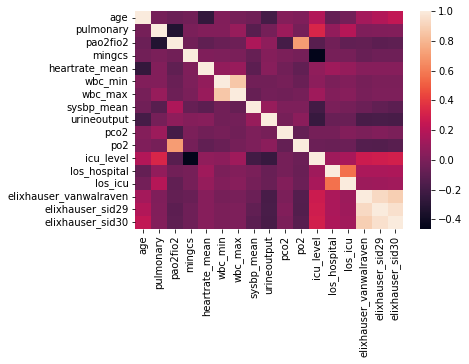

In [69]:
corr = df.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)

In [70]:
for colName, colType in zip(df.columns, df.dtypes):
    if(colType == "object"):
        df[colName] = df[colName].astype('category')
        df[colName] = df[colName].cat.codes
df.dtypes

age                       float64
pulmonary                   int64
pao2fio2                  float64
mingcs                    float64
heartrate_mean            float64
wbc_min                   float64
wbc_max                   float64
sysbp_mean                float64
urineoutput               float64
pco2                      float64
po2                         int64
icu_level                   int64
gender                       int8
los_hospital              float64
ethnicity_grouped            int8
los_icu                   float64
first_icu_stay               int8
elixhauser_vanwalraven    float64
elixhauser_sid29          float64
elixhauser_sid30          float64
dtype: object

In [71]:
target = df.pop("icu_level")
X_train, X_test, y_train, y_test = train_test_split(df, target, test_size=0.33, random_state=42)

In [72]:
train = xgb.DMatrix(X_train, label=y_train)
test  = xgb.DMatrix(X_test, label=y_test)

In [73]:
epochs = 10
param = {
    'eta':0.9,
    'objective': 'multi:softmax',
    'num_class': 4
}

In [74]:
model = xgb.train(param, train, epochs)

In [75]:
pred = model.predict(test)
acc = accuracy_score(y_test,pred)

In [76]:
print("Model Accuracy :", acc)
print(y_train.value_counts())

Model Accuracy : 0.8056131398501036
1    8879
2    2940
3     912
Name: icu_level, dtype: int64


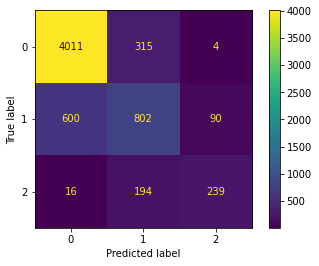

In [77]:
cm = confusion_matrix(y_test, pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [78]:
xgb_class = XGBClassifier(param, num_boost_round=epochs, nfold=5,
             metrics={'merror'}, seed=0)
xgb_class                    

Pass `objective` as keyword args.  Passing these as positional arguments will be considered as error in future releases.


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, gamma=None,
              gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, metrics={'merror'}, min_child_weight=None,
              missing=nan, monotone_constraints=None, n_estimators=100,
              n_jobs=None, nfold=5, num_boost_round=10, num_parallel_tree=None,
              objective={'eta': 0.9, 'num_class': 4,
                         'objective': 'multi:softmax'}, ...)

In [79]:
le = LabelEncoder()
target = le.fit_transform(target)
target

array([2, 0, 0, ..., 0, 0, 0], dtype=int64)

In [80]:
X_train, X_test, y_train, y_test = train_test_split(df, target, test_size=0.33, random_state=42)

In [81]:
xgb_class.fit(X_train, y_train)

[14:26:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "metrics", "nfold", "num_boost_round" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, metrics={'merror'},
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, nfold=5, num_boost_round=10,
              num_parallel_tree=1, objective='multi:softprob', ...)

In [82]:
y_predicted = xgb_class.predict(X_test)

In [83]:
acc = accuracy_score(y_test,y_predicted)
print("Model Accuracy :", acc)

Model Accuracy : 0.8154999202678999


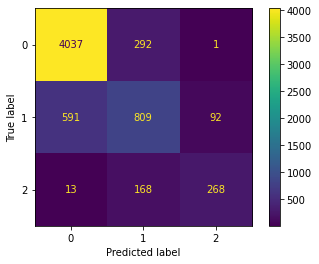

In [84]:
cm = confusion_matrix(y_test, y_predicted)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [85]:
df_rootDataset = pd.read_csv("./data/rootDataset.csv")

In [86]:
df_fpm = pd.DataFrame([df_rootDataset["bilirubin_min"], df_rootDataset["age"], df_rootDataset["heartrate_mean"], df_rootDataset["meanbp_mean"], df_rootDataset["wbc_min"], df_rootDataset["wbc_max"], df_rootDataset["pco2"], df_rootDataset["pao2fio2"], df_rootDataset["mingcs"], df_rootDataset["temperature"], df_rootDataset["los"], df_rootDataset["sysbp_mean"], df_rootDataset["glucose_mean"], df_rootDataset["sodium_min"], df_rootDataset["sodium_max"], df_rootDataset["creatinine_min"], df_rootDataset["creatinine_max"], df_rootDataset["platelet_min"], df_rootDataset["platelet_max"], df_rootDataset["urineoutput"], df_rootDataset["icu_level"]]).transpose()
for col in df_fpm:
    print(col)

bilirubin_min
age
heartrate_mean
meanbp_mean
wbc_min
wbc_max
pco2
pao2fio2
mingcs
temperature
los
sysbp_mean
glucose_mean
sodium_min
sodium_max
creatinine_min
creatinine_max
platelet_min
platelet_max
urineoutput
icu_level


In [87]:
df_fpm.pop("wbc_min")
df_fpm.pop("sodium_min")
df_fpm.pop("creatinine_min")
df_fpm.pop("platelet_min")
df_fpm.pop("platelet_max")
df_fpm.pop("mingcs")
df_fpm.pop("sysbp_mean")

0         103.423077
1         103.423077
2         103.423077
3         103.423077
4         103.181818
             ...    
164179    104.464286
164180    104.464286
164181    104.464286
164182    104.464286
164183    104.464286
Name: sysbp_mean, Length: 164184, dtype: float64

In [88]:
epochs = 20
param = {
    'eta':0.5,
    'objective': 'multi:softmax',
    'num_class': 4
}
xgb_class = XGBClassifier(param, num_boost_round=epochs, nfold=5,
             metrics={'merror'}, seed=0)
xgb_class            

Pass `objective` as keyword args.  Passing these as positional arguments will be considered as error in future releases.


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, gamma=None,
              gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, metrics={'merror'}, min_child_weight=None,
              missing=nan, monotone_constraints=None, n_estimators=100,
              n_jobs=None, nfold=5, num_boost_round=20, num_parallel_tree=None,
              objective={'eta': 0.5, 'num_class': 4,
                         'objective': 'multi:softmax'}, ...)

In [89]:
target = df_fpm.pop("icu_level")

In [90]:
le = LabelEncoder()
target = le.fit_transform(target)
target

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [91]:
X_train, X_test, y_train, y_test = train_test_split(df_fpm, target, test_size=0.33, random_state=42)

In [92]:
xgb_class.fit(X_train, y_train)

[14:26:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "metrics", "nfold", "num_boost_round" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, metrics={'merror'},
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, nfold=5, num_boost_round=20,
              num_parallel_tree=1, objective='multi:softprob', ...)

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check th

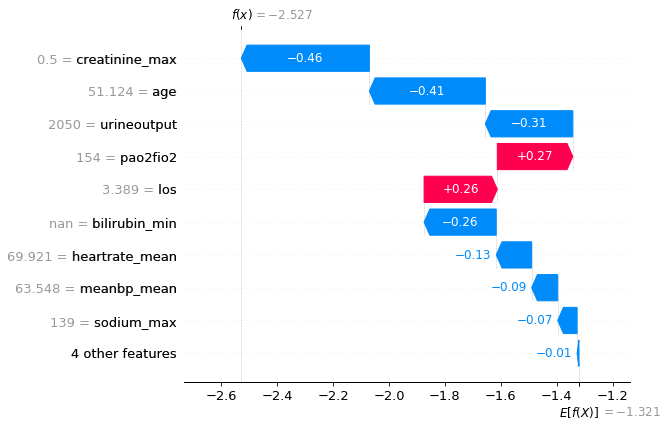

In [93]:
background = shap.maskers.Independent(X_train, max_samples=100)
def f(x):
    return shap.links.identity(xgb_class.predict_proba(x, validate_features=False)[:,1])
explainer = shap.Explainer(f, background, link=shap.links.logit)
shap_values = explainer(X_train[:100])
shap.plots.waterfall(shap_values[0])

In [94]:
y_predicted = xgb_class.predict(X_test)

In [95]:
acc = accuracy_score(y_test,y_predicted)
print("Model Accuracy :", acc)

Model Accuracy : 0.8815636477732046


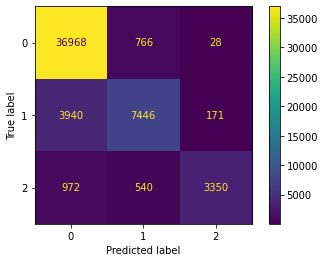

In [96]:
cm = confusion_matrix(y_test, y_predicted)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [97]:
df_externalVal = pd.read_csv("./data/externalvalidation.csv")
for col in df_externalVal.columns:
    print(col)

patientunitstayid
apacheapsvarid
intubated
vent
dialysis
eyes
motor
verbal
meds
urine
wbc
temperature
respiratoryrate
sodium
heartrate
meanbp
ph
hematocrit
albumin
pco2
bun
glucose
bilirubin
apachepatientsresultsid
physicianspeciality
physicianinterventioncategory
acutephysiologyscore
apachescore
apacheversion
predictedicumortality
actualicumortality
predictediculos
actualiculos
predictedhospitalmortality
actualhospitalmortality
predictedhospitallos
actualhospitallos
preopmi
preopcardiaccath
ptcawithin24h
unabridgedunitlos
unabridgedhosplos
actualventdays
predventdays
unabridgedactualventdays
apachepredvarid
sicuday
saps3day1
saps3today
saps3yesterday
gender
teachtype
region
bedcount
admitsource
graftcount
age
admitdiagnosis
thrombolytics
diedinhospital
aids
hepaticfailure
lymphoma
metastaticcancer
leukemia
immunosuppression
cirrhosis
electivesurgery
activetx
readmit
ima
midur
ventday1
oobventday1
oobintubday1
diabetes
managementsystem
var03hspxlos
pao2
fio2
ejectfx
creatinine
discharg

In [98]:
df_externalVal.drop_duplicates(subset="patientunitstayid")
df_externalVal.shape

(1069, 91)

In [99]:
df_fpmExternalValidation = pd.DataFrame(
[
    df_externalVal["bilirubin"],
    df_externalVal["albumin"],
    df_externalVal["age"],
    df_externalVal["heartrate"], 
    df_externalVal["meanbp"],
    df_externalVal["wbc"],
    df_externalVal["pco2"],
    df_externalVal["day1pao2"],
    df_externalVal["day1fio2"],
    df_externalVal["actualiculos"],
    df_externalVal["glucose"],
    df_externalVal["temperature"],
    df_externalVal["sodium"],
    df_externalVal["creatinine"],
    df_externalVal["urine"],
    df_externalVal["apachescore"],
    ]).transpose()

In [100]:
df_fpmExternalValidation = df_fpmExternalValidation.replace(-1.0, np.NaN)

In [101]:
df_fpmExternalValidation["po2fio2"] = df_fpmExternalValidation[['day1pao2', 'day1fio2']].mean(axis=1)

In [102]:
df_fpmExternalValidation.pop('day1pao2')
df_fpmExternalValidation.pop('day1fio2')

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
1064     NaN
1065     NaN
1066    60.0
1067    50.0
1068     NaN
Name: day1fio2, Length: 1069, dtype: float64

In [103]:
print(df_fpmExternalValidation["apachescore"].isna().sum())
print(df_fpmExternalValidation.shape)
df_fpmExternalValidation = df_fpmExternalValidation.dropna(subset=['apachescore'])
print(df_fpmExternalValidation.shape)

7
(1069, 15)
(1062, 15)


In [104]:
def apache_to_mr(score):
    logit = -3.517 + (0.146 * score)
    return (np.exp(logit)) / (1 + np.exp(logit))

def to_icu_level(df):
    df_fpmExternalValidation["icu_level"] = ""
    for i, row in df.iterrows():
        if(row["avrg_mr"] > 0 and row["avrg_mr"] <= 0.33):
            df_fpmExternalValidation.at[i, "icu_level"] = 1
        elif(row["avrg_mr"] > 0.33 and row["avrg_mr"] <= 0.66):
            df_fpmExternalValidation.at[i, "icu_level"] = 2
        else:
            df_fpmExternalValidation.at[i, "icu_level"] = 3
    return df

In [105]:
df_fpmExternalValidation["avrg_mr"] = ""
for i, row in df_fpmExternalValidation.iterrows():
    df_fpmExternalValidation.at[i, "avrg_mr"] = apache_to_mr(row["apachescore"])

In [106]:
df_fpmExternalValidation[["avrg_mr", "apachescore"]]

,avrg_mr,apachescore
0,0.786003,33.0
1,0.92194,41.0
2,0.999881,86.0
3,0.85056,36.0
4,0.898165,39.0
...,...,...
1064,0.146165,12.0
1065,0.996601,63.0
1066,0.760423,32.0
1067,0.389123,21.0


In [107]:
df_fpmExternalValidation = to_icu_level(df_fpmExternalValidation)

In [108]:
df_fpmExternalValidation["icu_level"]

0       3
1       3
2       3
3       3
4       3
       ..
1064    1
1065    3
1066    3
1067    2
1068    3
Name: icu_level, Length: 1062, dtype: object

In [109]:
df_fpmExternalValidation["icu_level"].value_counts()

3    936
2     96
1     30
Name: icu_level, dtype: int64

<AxesSubplot:xlabel='icu_level', ylabel='Count'>

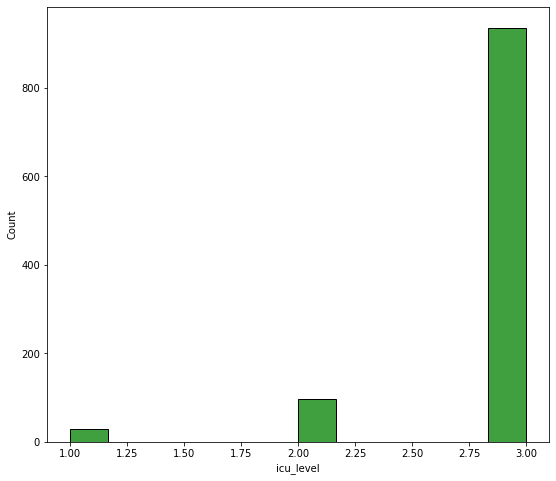

In [110]:
plt.figure(figsize=(9, 8))
sns.histplot(df_fpmExternalValidation["icu_level"], color='g')

In [111]:
target = df_fpmExternalValidation.pop("icu_level")
df_fpmExternalValidation.pop("apachescore")
df_fpmExternalValidation.pop("avrg_mr")

0       0.786003
1        0.92194
2       0.999881
3        0.85056
4       0.898165
          ...   
1064    0.146165
1065    0.996601
1066    0.760423
1067    0.389123
1068    0.965941
Name: avrg_mr, Length: 1062, dtype: object

In [112]:
print(df_fpmExternalValidation.columns)
print(df_fpmExternalValidation.shape)

Index(['bilirubin', 'albumin', 'age', 'heartrate', 'meanbp', 'wbc', 'pco2',
       'actualiculos', 'glucose', 'temperature', 'sodium', 'creatinine',
       'urine', 'po2fio2'],
      dtype='object')
(1062, 14)


In [113]:
df_fpmExternalValidation.rename(columns = {
'bilirubin':'bilirubin_min',
'age':'age',
'heartrate':'heartrate_mean', 
'meanbp':'meanbp_mean',
'pco2':'pco2',
'po2fio2':'po2fio2',
'temperature':'temperature',
'actualiculos':'los',
'glucose':'glucose_mean',
'urine':'urineoutput',
'creatinine':'creatinine_min',
'sodium':'sodium_min',
'wbc':'wbc_min'
}, inplace = True)

In [114]:
df_fpmExternalValidation = df_fpmExternalValidation[[
'bilirubin_min',
'age',
'heartrate_mean', 
'meanbp_mean',
'pco2',
'po2fio2',
'temperature',
'los',
'glucose_mean',
'urineoutput',
'creatinine_min',
'sodium_min',
'wbc_min'
]]
df_fpmExternalValidation

,bilirubin_min,age,heartrate_mean,meanbp_mean,pco2,po2fio2,temperature,los,glucose_mean,urineoutput,creatinine_min,sodium_min,wbc_min
0,NaN,47.0,86.0,64.0,NaN,NaN,36.2,1.0034,55.0,NaN,NaN,134.0,11.20
1,NaN,61.0,103.0,66.0,51.0,NaN,NaN,3.3340,279.0,NaN,2.70,143.0,NaN
2,NaN,58.0,112.0,56.0,NaN,NaN,36.9,16.7145,122.0,2778.7104,0.78,135.0,11.10
3,NaN,84.0,110.0,126.0,NaN,NaN,36.0,2.0902,NaN,1488.5856,1.13,NaN,NaN
4,0.2,41.0,103.0,153.0,NaN,NaN,35.6,1.0333,78.0,NaN,0.79,136.0,4.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1064,1.4,NaN,110.0,40.0,NaN,NaN,36.3,2.0076,301.0,1664.8416,1.70,123.0,7.30
1065,NaN,59.0,90.0,49.0,NaN,NaN,35.4,10.6875,62.0,NaN,4.24,140.0,12.80
1066,NaN,69.0,60.0,119.0,NaN,192.0,36.4,0.9340,100.0,722.1312,1.11,131.0,6.10
1067,NaN,85.0,113.0,73.0,NaN,60.0,36.3,0.5520,NaN,848.7072,1.22,NaN,NaN


In [115]:
le = LabelEncoder()
target = le.fit_transform(target)
target

array([2, 2, 2, ..., 2, 1, 2])

In [116]:
X_train, X_test, y_train, y_test = train_test_split(df_fpmExternalValidation, target, test_size=0.33, random_state=64)

In [117]:
y_predicted = xgb_class.predict(df_fpmExternalValidation)

In [118]:
acc = accuracy_score(target,y_predicted)
print("Model Accuracy :", acc)

Model Accuracy : 0.5753295668549906


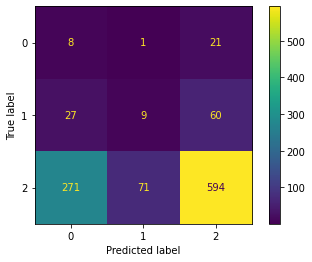

In [119]:
cm = confusion_matrix(target, y_predicted)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()